In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [263]:
df = pd.read_csv('/content/drive/MyDrive/ML Projects/breast_cancer_detection.csv')

In [264]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [265]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [267]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [268]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [269]:
df.drop(columns='Unnamed: 32', axis=1, inplace=True)

In [270]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [271]:
df.shape

(569, 32)

<Axes: xlabel='count', ylabel='diagnosis'>

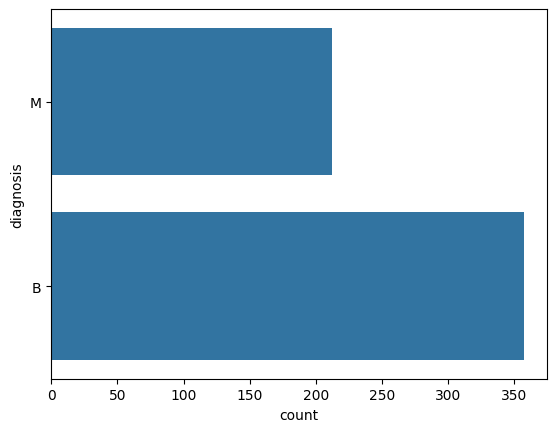

In [272]:
sns.countplot(df['diagnosis'])

<Axes: xlabel='diagnosis', ylabel='area_worst'>

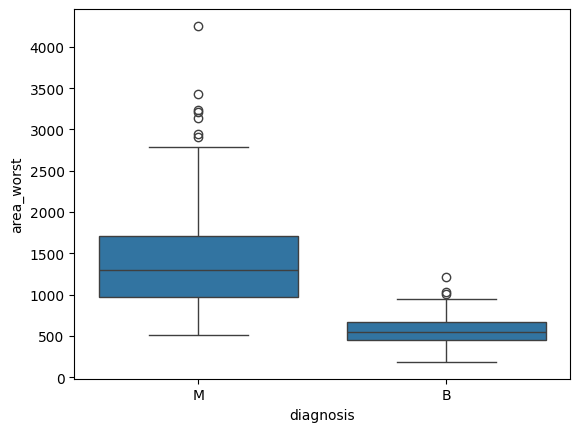

In [273]:
sns.boxplot(data=df, x='diagnosis', y='area_worst')

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

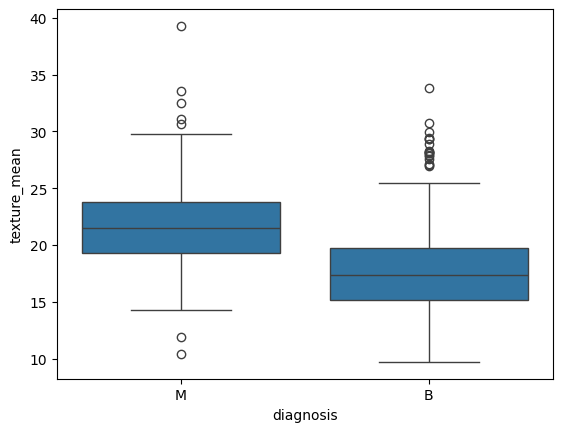

In [274]:
sns.boxplot(data=df, x='diagnosis', y='texture_mean')

<Axes: xlabel='diagnosis', ylabel='smoothness_worst'>

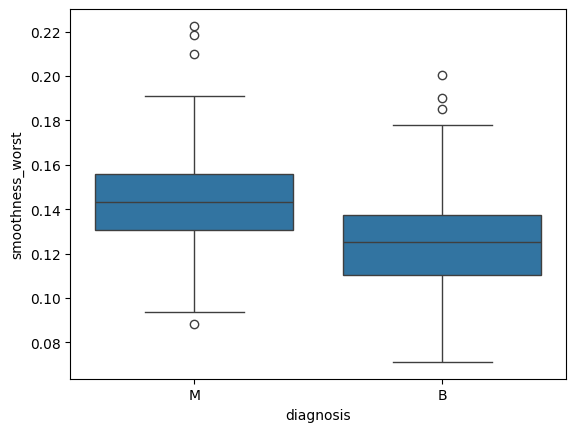

In [275]:
  sns.boxplot(data=df, x='diagnosis', y='smoothness_worst')

<Axes: xlabel='diagnosis', ylabel='compactness_worst'>

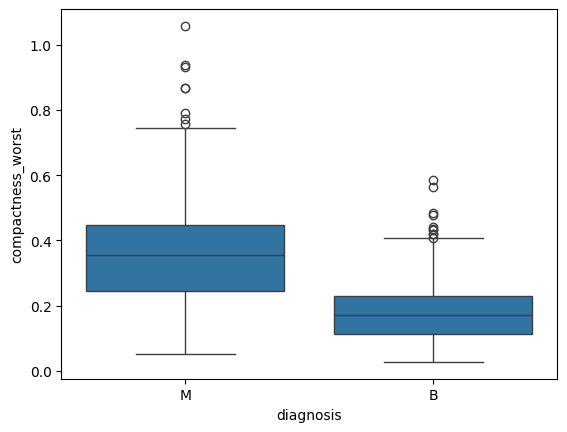

In [276]:
sns.boxplot(data=df, x='diagnosis', y='compactness_worst')

<Axes: xlabel='diagnosis', ylabel='concavity_worst'>

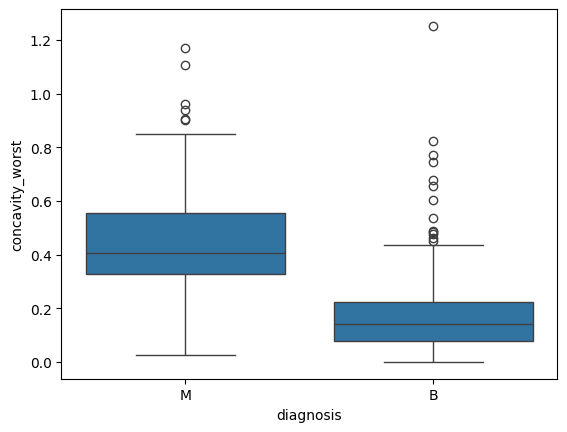

In [277]:
sns.boxplot(data=df, x='diagnosis', y='concavity_worst')

<Axes: xlabel='diagnosis', ylabel='symmetry_worst'>

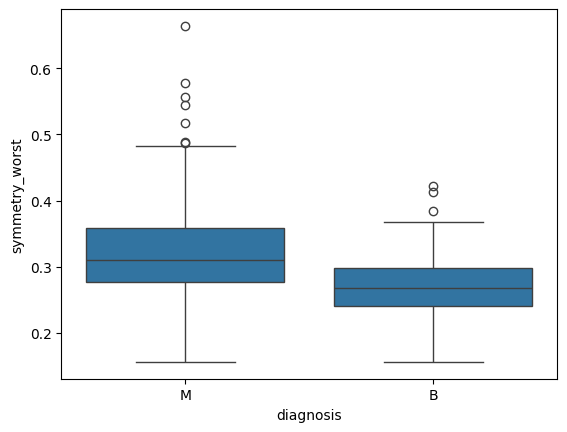

In [278]:
sns.boxplot(data=df, x='diagnosis', y='symmetry_worst')

<Axes: xlabel='diagnosis', ylabel='concave points_worst'>

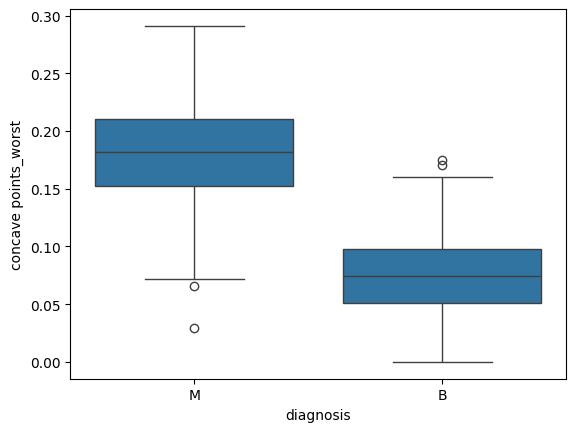

In [279]:
sns.boxplot(data=df, x='diagnosis', y='concave points_worst')

In [280]:
dfd = df.copy()

In [281]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfd['diagnosis'] = le.fit_transform(dfd['diagnosis'])

In [282]:
pearson_df = (
    dfd.corr()['diagnosis']
    .sort_values(ascending=False)
    .reset_index()
)

pearson_df.columns = ['Feature', 'Pearson Correlation']
pearson_df

,Feature,Pearson Correlation
0,diagnosis,1.000000
1,concave points_worst,0.793566
2,perimeter_worst,0.782914
3,concave points_mean,0.776614
4,radius_worst,0.776454
5,perimeter_mean,0.742636
6,area_worst,0.733825
7,radius_mean,0.730029
8,area_mean,0.708984
9,concavity_mean,0.696360


In [283]:
final_df = dfd[['diagnosis','area_worst', 'concave points_worst', 'compactness_worst', 'concavity_worst', 'texture_mean']]

In [284]:
final_df.head()

,diagnosis,area_worst,concave points_worst,compactness_worst,concavity_worst,texture_mean
0,1,2019.0,0.2654,0.6656,0.7119,10.38
1,1,1956.0,0.1860,0.1866,0.2416,17.77
2,1,1709.0,0.2430,0.4245,0.4504,21.25
3,1,567.7,0.2575,0.8663,0.6869,20.38
4,1,1575.0,0.1625,0.2050,0.4000,14.34


In [285]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

cols = ['area_worst', 'concave points_worst', 'compactness_worst', 'concavity_worst', 'texture_mean']

final_df[cols] = sc.fit_transform(final_df[cols])

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X=final_df.drop('diagnosis', axis=1)
y=final_df['diagnosis']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##Decision Tree Classifier

In [289]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [290]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [291]:
y_pred = model.predict(X_test)

In [292]:
model.score(X_test, y_test)

0.956140350877193

In [293]:
from sklearn.metrics import confusion_matrix, classification_report

In [294]:
confusion_matrix(y_test, y_pred)

array([[72,  0],
       [ 5, 37]])

In [295]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## Support Vector Machine (SVM)

In [296]:
from sklearn.svm import SVC
svc = SVC(C=30, kernel='linear', random_state=42)

In [297]:
svc.fit(X_train, y_train)

SVC(C=30, kernel='linear', random_state=42)

In [298]:
svc_pred = svc.predict(X_test)

In [299]:
svc.score(X_test, y_test)

0.9649122807017544

In [300]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, svc_pred)

array([[72,  0],
       [ 4, 38]])

## Cross-Validation Results (Grid Seach CV)

In [301]:
from sklearn.model_selection import GridSearchCV

g_model = GridSearchCV((svc),{
    'C':[10,20,30,40,50],
    'kernel':['rbf','linear'],
}, cv=5, return_train_score=False)

In [302]:
g_model.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(C=30, kernel='linear', random_state=42),
             param_grid={'C': [10, 20, 30, 40, 50],
                         'kernel': ['rbf', 'linear']})

In [303]:
results = pd.DataFrame(g_model.cv_results_)

In [304]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003638,0.000297,0.001788,0.000090,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.956140,0.956140,0.991228,0.956140,0.973451,0.966620,0.014012,2
1,0.004034,0.000518,0.001509,0.000045,10,linear,"{'C': 10, 'kernel': 'linear'}",0.938596,0.956140,0.991228,0.956140,0.955752,0.959571,0.017206,9
2,0.003526,0.000170,0.001643,0.000022,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.964912,0.964912,1.000000,0.947368,0.973451,0.970129,0.017180,1
3,0.005343,0.001891,0.001515,0.000023,20,linear,"{'C': 20, 'kernel': 'linear'}",0.938596,0.956140,0.991228,0.956140,0.955752,0.959571,0.017206,9
4,0.003883,0.000389,0.001627,0.000016,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.956140,0.956140,1.000000,0.947368,0.973451,0.966620,0.018714,2
5,0.006744,0.003638,0.001534,0.000044,30,linear,"{'C': 30, 'kernel': 'linear'}",0.938596,0.964912,0.991228,0.956140,0.955752,0.961326,0.017214,6
6,0.003857,0.000325,0.001810,0.000204,40,rbf,"{'C': 40, 'kernel': 'rbf'}",0.956140,0.956140,1.000000,0.947368,0.973451,0.966620,0.018714,2
7,0.009710,0.006211,0.001903,0.000331,40,linear,"{'C': 40, 'kernel': 'linear'}",0.938596,0.964912,0.991228,0.956140,0.955752,0.961326,0.017214,6
8,0.004047,0.000481,0.001748,0.000203,50,rbf,"{'C': 50, 'kernel': 'rbf'}",0.956140,0.956140,1.000000,0.947368,0.973451,0.966620,0.018714,2
9,0.008254,0.004074,0.001551,0.000047,50,linear,"{'C': 50, 'kernel': 'linear'}",0.938596,0.964912,0.991228,0.956140,0.955752,0.961326,0.017214,6


In [305]:
results[['param_C',	'param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.966620
1,10,linear,0.959571
2,20,rbf,0.970129
3,20,linear,0.959571
4,30,rbf,0.966620
5,30,linear,0.961326
6,40,rbf,0.966620
7,40,linear,0.961326
8,50,rbf,0.966620
9,50,linear,0.961326


## Random Forest Classifier


In [306]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)

In [308]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [309]:
rf_pred = rf_model.predict(X_test)

In [310]:
rf_model.score(X_test, y_test)

0.9736842105263158

In [311]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, rf_pred)

array([[72,  0],
       [ 3, 39]])

In [312]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [313]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy :", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy : 0.956140350877193
